<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Example of Hyper-parameter Optimisation 

Example of performing in TMVA an hyper-parameter optimisation

### Input Data File

In [1]:
auto inputFile = TFile::Open("Higgs_data.root");

In [2]:
inputFile->ls();

TFile**		Higgs_data.root	
 TFile*		Higgs_data.root	
  KEY: TTree	sig_tree;1	tree
  KEY: TTree	bkg_tree;1	tree


## Declare DataLoader

First we need to declare a DataLoader and add the variables (passing the variable names used in the test and train trees in input dataset). To add variable names to DataLoader we use the AddVariable function. Arguments of this function:

1. String containing the variable name. Using ":=" we can add definition too.

2. String (label to variable, if not present the variable name will be used) or character (defining the type of data points)

3. If we have label for variable, the data point type still can be passed as third argument 

Example: 

loader.AddVariable( "myvar1 := var1+var2", 'F' )


In [3]:
TMVA::DataLoader loader("dataset");

// add variables to loader 
loader.AddVariable("m_jj");
loader.AddVariable("m_jjj");
loader.AddVariable("m_lv");
loader.AddVariable("m_jlv");
loader.AddVariable("m_bb");
loader.AddVariable("m_wbb");
loader.AddVariable("m_wwbb");

TMVA::gConfig().SetDrawProgressBar( false);

## Setup Dataset(s)

To pass the signal and background trees to DataLoader we use the AddSignalTree and AddBackgroundTree functions, and we set up the corresponding DataLoader using the  *PrepareTrainingAndTestTree* function. 
With the *PrepareTrainingAndTestTree*  we can specify the number of event used for training and testing. 
In this case, we use a very small number (e.g. 500), since we will repeat the train and test procedure several times 

In [4]:
TCut mycuts;
TCut mycutb;

auto tsignal =  (TTree*) inputFile->Get("sig_tree");
auto tbackground =  (TTree*) inputFile->Get("bkg_tree");

loader.AddSignalTree    (tsignal,     1.0);   //signal weight  = 1
loader.AddBackgroundTree(tbackground, 1.0);   //background weight = 1 


loader.PrepareTrainingAndTestTree(mycuts, mycutb,
                                  "nTrain_Signal=100:nTrain_Background=100:nTest_Signal=1000:nTest_Background=1000:"
                                  "SplitMode=Random:NormMode=NumEvents:!V" );


DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree sig_tree of type Signal with 10000 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree bkg_tree of type Background with 10000 events


## Hyper-Parameter Optimisation

Run now the hyperparameter optimisation algorithm
 

In [5]:
TMVA::HyperParameterOptimisation optim(&loader);

TStopwatch tw; 

#### Book method
Define the method we want to use for the hyperparameter optimisation

In [6]:
optim.BookMethod(TMVA::Types::kBDT, "BDT",
             "V:NTrees=500:MinNodeSize=2.5%:MaxDepth=3:BoostType=AdaBoost:AdaBoostBeta=0.5:"
             "UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" );


#### Run the algorithm
Run here the hyper-parameter optimisation algorithm. Be patient it may take some time....

In [7]:
optim.SetFitter("Scan");
optim.SetNumFolds(3);
tw.Start();

optim.Evaluate();
tw.Print();

Real time 0:07:13, CP time 431.350


#### Get the result
Retrieve the obtained result in terms of importance of each variable. Visualize also the variable importance in an histogram.

In [8]:
auto results=optim.GetResults();

results.Print();

<HEADER> HyperParameterOptimisa...: ===========================================================
                         : Optimisation for BDT fold 1
                         : AdaBoostBeta     0.2
                         : MaxDepth     4
                         : MinNodeSize     5.16527
                         : NTrees     257.5
<HEADER> HyperParameterOptimisa...: ===========================================================
                         : Optimisation for BDT fold 2
                         : AdaBoostBeta     0.2
                         : MaxDepth     4
                         : MinNodeSize     1.5986
                         : NTrees     257.5
<HEADER> HyperParameterOptimisa...: ===========================================================
                         : Optimisation for BDT fold 3
                         : AdaBoostBeta     0.2
                         : MaxDepth     2
                         : MinNodeSize     3.63318
                         : NTrees    

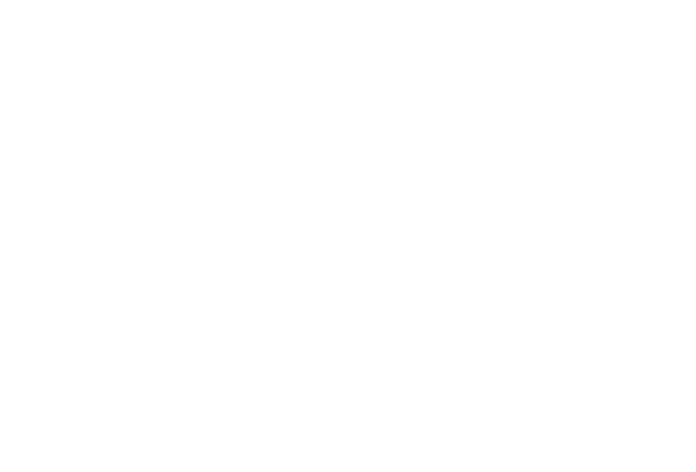

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [9]:
auto graph = results.GetROCCurves(); 
graph->Draw(); 
gPad->Draw(); 